In [2]:
import os

models_paths = [os.environ["DATA"] + "/03_paper_popalg/03_CLScore_opt/05.03_GDB_like_CLScore_opt_from_none_pop_457k_no_prop_comput_batch"]

model_names = ["CLScore_457k"]
prop_key = "CLScore"

output_fig_dir = os.environ["FIGURES"] + "/03_paper_popalg/03_CLScore_opt/05.03_457k_CLScore_batch_opt_from_none"


In [3]:
from chempopalg.plot_results import extract_data_multiple_models

union_models_data_dict = extract_data_multiple_models(models_paths, model_names, fix_dict={"scf": "scaf", 
                                                                                           "ifg": "efg",
                                                                                           "max": "best"})

### Fixing SAScore

In [4]:
for k in union_models_data_dict.keys():
    for k_df in union_models_data_dict[k].keys():
        if "SAScore" in k_df and "std" not in k_df:
            union_models_data_dict[k][k_df] = 1 - (-union_models_data_dict[k][k_df] - 1)/9
    

### Results stats

In [5]:
import numpy as np
union_models_data_dict["pop"].describe()

max_values = []
mean_values = []

for run in range(10):
    max_values.append(np.max(union_models_data_dict["pop"][union_models_data_dict["pop"]["run"] == str(run)][prop_key]))
    mean_values.append(np.mean(union_models_data_dict["pop"][union_models_data_dict["pop"]["run"] == str(run)][prop_key]))
    
print("max : " + str(np.mean(max_values)) + " +/- " + str(np.std(max_values)))
print("mean : " + str(np.mean(mean_values)) + " +/- " + str(np.std(mean_values)))

max : 6.753325234206498 +/- 0.06723157478726752
mean : 4.918952884898562 +/- 0.07208100101187671


### Potting time vs step

<Figure size 432x288 with 0 Axes>

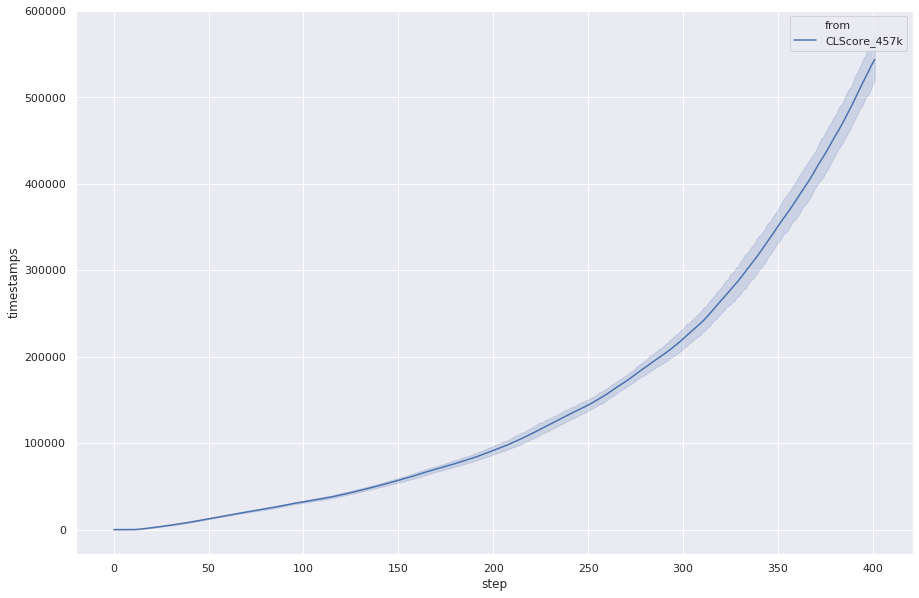

In [6]:
from qupopalg.plot_results import plot_time_vs_step

plot_time_vs_step(union_models_data_dict, output_fig_dir)


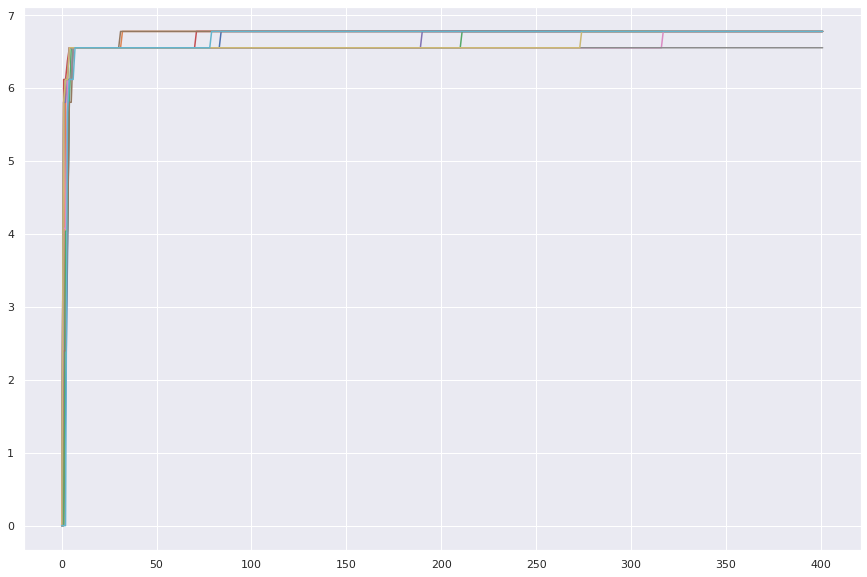

In [7]:
import numpy as np

qed_max = union_models_data_dict["steps"]["CLScore_best"][union_models_data_dict["steps"]["run"] == "9"].to_numpy()
qed_max_sorted = np.sort(qed_max)

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
for i in range(10):
    sns.lineplot(np.arange(len(union_models_data_dict["steps"]["CLScore_best"][union_models_data_dict["steps"]["run"] == str(i)].to_numpy())),
        union_models_data_dict["steps"]["CLScore_best"][union_models_data_dict["steps"]["run"] == str(i)].to_numpy())

### Plotting objective functions vs step 

<Figure size 432x288 with 0 Axes>

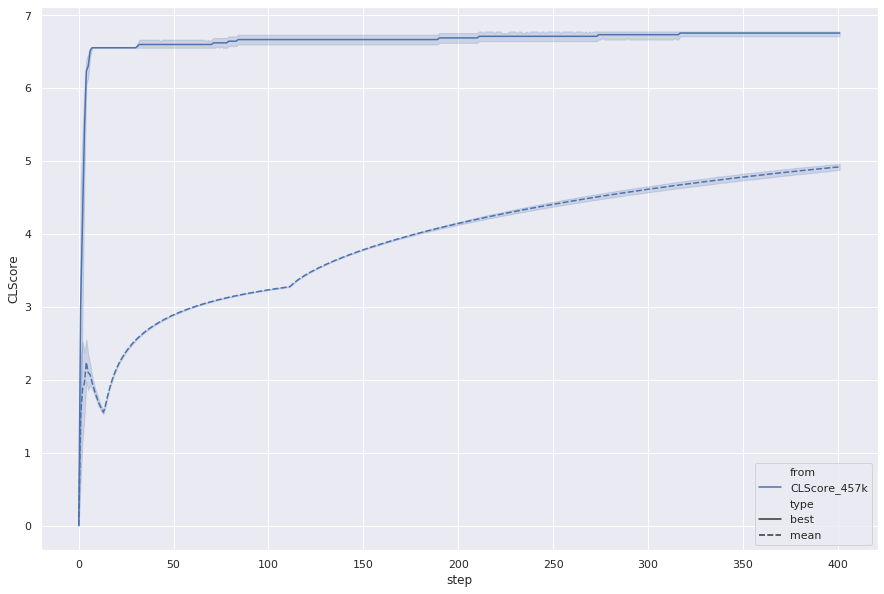

In [8]:
from qupopalg.plot_results import plot_steps_property

plot_steps_property(union_models_data_dict, "CLScore", ["best", "mean"], ["CLScore_best", "CLScore_mean"],
                    output_dir_path=output_fig_dir)

### Plotting all properties vs step 

<Figure size 432x288 with 0 Axes>

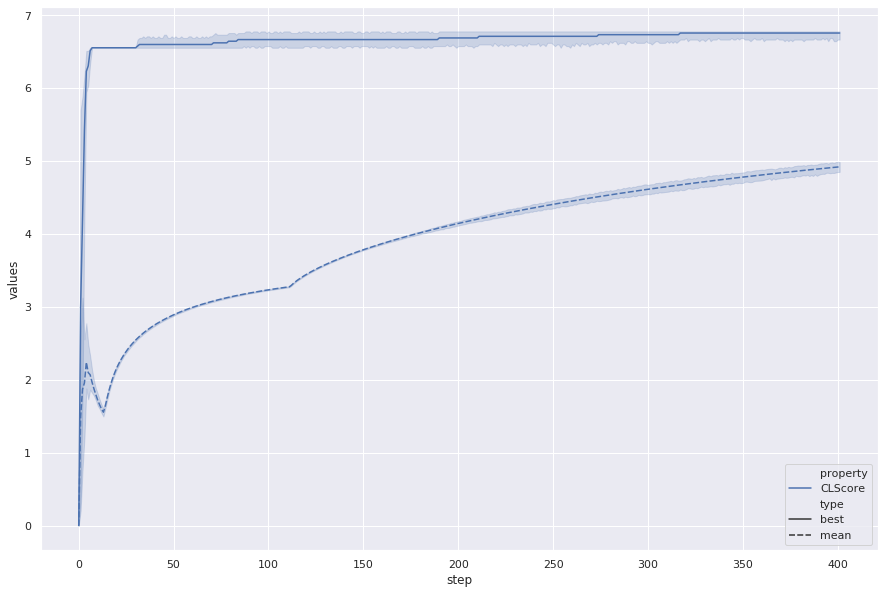

In [11]:
from qupopalg.plot_results import plot_steps_multi_properties

plot_steps_multi_properties(union_models_data_dict, ["CLScore"], ["best", "mean"], output_fig_dir)


### Plotting property distribution

<Figure size 432x288 with 0 Axes>

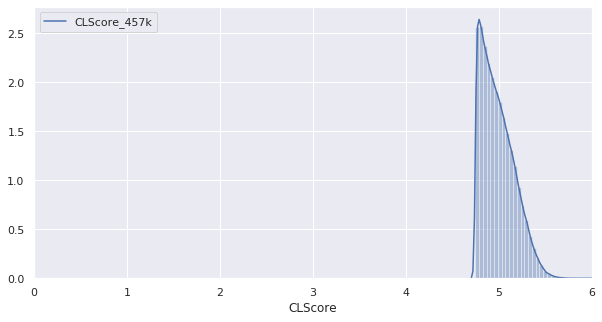

In [18]:
from qupopalg import plot_results
plot_results.figsize=(10, 5)
plot_results.plot_prop_distribution_pop(union_models_data_dict, "CLScore", output_fig_dir, run="0", xlim=(0, 6))

### Plotting objective function vs time

In [13]:
plot_steps_property(union_models_data_dict, "CLScore", ["best", "mean"], ["CLScore_best", "CLScore_mean"],
                    output_dir_path=output_fig_dir, x_key="timestamps")

<Figure size 432x288 with 0 Axes>

### Plotting # no ind replaced

<Figure size 432x288 with 0 Axes>

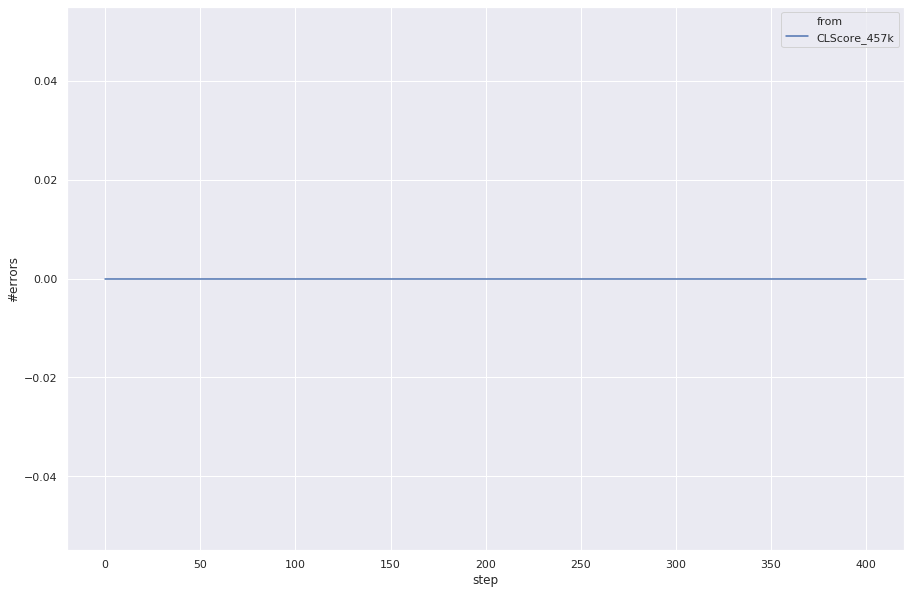

In [14]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "No individual replaced", model_names=model_names, output_dir_path=output_fig_dir)

### Plotting # MM errors vs step

<Figure size 432x288 with 0 Axes>

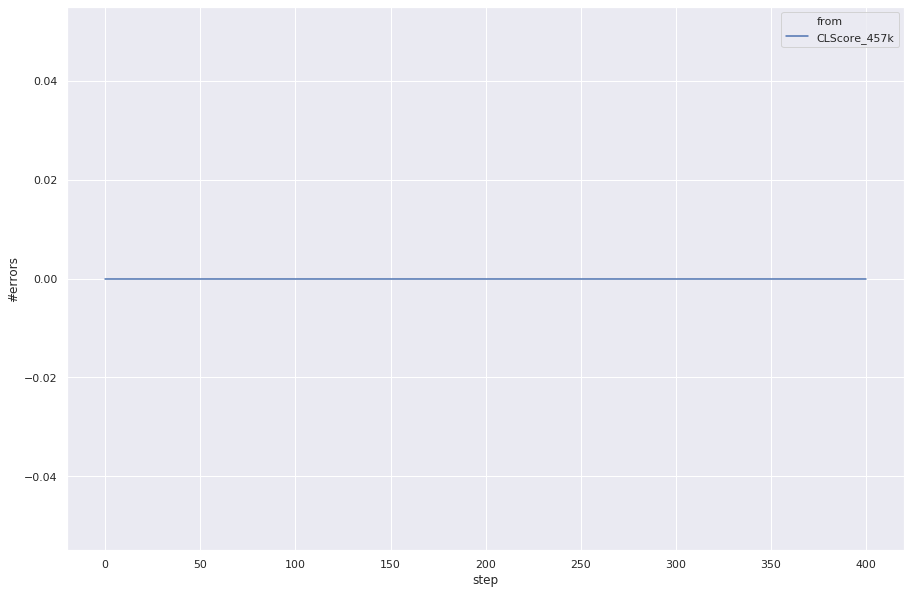

In [15]:
from qupopalg.plot_results import plot_n_errors_per_step

plot_n_errors_per_step(union_models_data_dict, "MM", model_names=model_names, output_dir_path=output_fig_dir)